# Hackathon 1: descriptive statistics, estimation and bootstrapping

This project illustrates the course LEPL1109 with an industrial applications of statistics. You will analyse the performance of wind farms located in the Walloon Brabant near Beauvechain and in the high Fens, close to Elsenborn. Each wind farm exploits 8 wind turbines. The kinetic power, noted Pk, (in watt) of one wind turbine is calculated with the formula 

Pk (W) = 0.5 x Rho x S x V^3

Where 

S   : is the surface of the circle in square meters with a radius equal to the length of blades (32 m).
Rho : is the air density (“masse volumique”). We consider here an average value of 1.2 kg/m^3
V   : is the speed of wind in m/s.

According to the Betz limit, only 59.3% of the kinetic energy from wind can be used to spin the turbine and generate electricity. In reality, turbines cannot reach the Betz limit, and the efficiency is estimated to 42% of the kinetic power. One wind turbine generates an electric power Pe = 0.42 x Pk. 

The wind turbins are stopped if the wind speed is above 90 km/h.

The file “BeauvechainWind.csv” and “Elsenborn.csv” contains the average daily wind speeds, measured in km/h, at Beauvechain and  Elsenborn (source www. https://www.ecad.eu/)

FILE FORMAT (MISSING VALUE CODE IS -9999):
01-06 SOUID: Source identifier
08-15 DATE : Date YYYYMMDD
17-21 FG   : wind speed in 0.1 m/s
23-27 Q_FG : Quality code for FG (0='valid'; 1='suspect'; 9='missing')


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Vincent Dieuzeide 6298-2000

Part. 2: Jeanne Crevits 2561-2000

Part. 3: Dorine Poelaert 2294-2000

Part. 4: Valentine Delaere 4253-2000

Part. 5:


------------------------------------------------------------------------------------------------------
1.	Write a function computing the electric power capacity (in Mega Watts = 10^6 W), for the two wind farms using wind data from the 1/1/2017 to the 1/1/2021

•	Do not forget to set the production to zero if the wind speed is above 90 km. 

•	Take care to converts units.

•	Remove all days with missing data (error code 1 or 9) for Beauvechain or Elsenborn

------------------------------------------------------------------------------------------------------

In [1]:
import csv;
import matplotlib.pyplot as plt;
import numpy as np;

In [2]:
def data1_2(nomduparc1_csv,nomduparc2_csv):
    f= open (nomduparc1_csv)
    g= open (nomduparc2_csv)
    myReader1 = csv.reader(f)
    myReader2 = csv.reader(g)
    Pui_elec_watt_eol1=[]
    Pui_elec_watt_eol2=[]
    dict_date = {}

    next(myReader1) # On skip la ligne 1 qui contient les noms de colonnes
    for row in myReader1:
        if 2017 <= int(row[1].strip()[:4]) <= 2020:
                if int(row[3].strip())==0:
                     if int(row[2].strip())<= 90:
                        dict_date[row[1].strip()] = int(row[2].strip())#On stock dans un dictionnaire les dates valident de Beauvechain pour 
                                                                       #les  comparer à celle de Elsenborn et prendre seulement celle en commun
                                                                       #(Demandé par le prof au CM4)
    next(myReader2) # On skip la ligne 1
    for row2 in myReader2:
        if 2017 <= int(row2[1].strip()[:4]) <= 2020:
            if int(row2[3].strip())==0:
                if int(row2[2].strip())<= 90:
                    if dict_date.get(row2[1].strip()):
                        
                        Pui_elec_watt_eol1.append((0.5*32*1.2*(dict_date[row2[1].strip()]*(1/3.6))**3)*0.42*8/10**6)
                        Pui_elec_watt_eol2.append((0.5*32*1.2*(int(row2[2].strip())*(1/3.6))**3)*0.42*8/10**6)
                        
    return [Pui_elec_watt_eol1,Pui_elec_watt_eol2]

def calculate_wind_power(pui):
    sum=0
    for i in pui:
        sum+=i
    return sum       
    

In [3]:

print("Capacité de puissance électrique à Beauvechain:",calculate_wind_power(data1_2(r"Beauvechain.csv",r"Elsenborn.csv")[0]))
print("Capacité de puissance électrique à Eisenborn:",calculate_wind_power(data1_2(r"Beauvechain.csv",r"Elsenborn.csv")[1]))

Capacité de puissance électrique à Beauvechain: 181.2460090864193
Capacité de puissance électrique à Eisenborn: 69.0701497283949


Comment briefly your results



On voit que la capacité d'énergie électrique récoltée à Beauvechain est supérieure à celle récoltée à Eisenborn.
On peut supposer que cela est du à un nombre plus important de mesure éronnée à Eisenborn.

------------------------------------------------------------------------------------------------------------------------

2.	Plot histograms and box plots of electric power capacity (MW) from the 1/1/2017 to the 1/1/2021 (both sites). 

------------------------------------------------------------------------------------------------------------------------

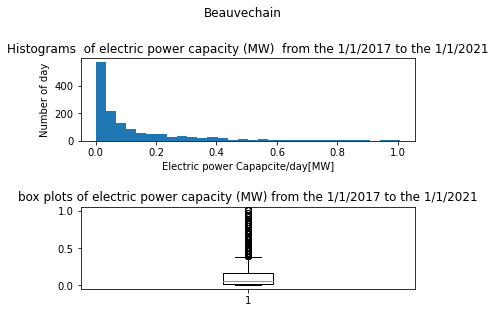

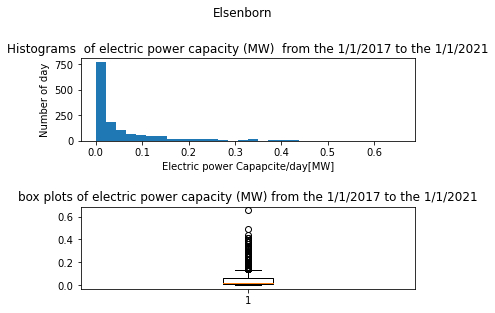

In [4]:
def plot_hist_box(data,nomduparc):
  

    fig, axs = plt.subplots(2)
    fig.suptitle(nomduparc)
    axs[0].hist(data,bins=30)
    axs[0].set_title('Histograms  of electric power capacity (MW)  from the 1/1/2017 to the 1/1/2021')
    
    axs[1].boxplot(data)
    axs[1].set_title("box plots of electric power capacity (MW) from the 1/1/2017 to the 1/1/2021")
    plt.subplots_adjust(left=0.125,bottom=0, right=0.9, top=0.8, wspace=0.5, hspace=0.8)
    axs[0].set(xlabel='Electric power Capapcite/day[MW]',ylabel='Number of day')


    





plot_hist_box(data1_2("Beauvechain.csv","Elsenborn.csv")[0],"Beauvechain")
plot_hist_box(data1_2("Beauvechain.csv","Elsenborn.csv")[1],"Elsenborn")


------------------------------------------------------------------------------------------------------

3.	Compare the following statistics of both sites and draw a first conclusions

•	Average and median powers for each farm (MW)

•	Standard deviations of powers, for each farm (MW)

•	5% and 95% percentiles of powers, for each farm (MW)

The average and standard deviation of the total power capacities (Beauvechain + Elsenborn).

------------------------------------------------------------------------------------------------------

In [5]:

def mean(datas):
    return np.mean(datas)
def deviations(datas):
    return np.std(datas)
def quantile(datas,q):
    return np.quantile(datas,q)
def average_commun(datas1,datas2):
    add=[]
    beauv=datas1
    elsen=datas2
    for i in range(len(beauv)):
        add.append(beauv[i]+elsen[i])
        i+=1
        
    return np.mean(add)
def deviation_commun(datas1,datas2):
    add=[]
    beauv=datas1
    elsen=datas2
    for i in range(len(beauv)):
        add.append(beauv[i]+elsen[i])
        i+=1
    return np.std(add)



In [6]:
print("Moyenne de la puissance électrique produite à Beauvechain:",mean(data1_2("Beauvechain.csv","Elsenborn.csv")[0]))
print("Moyenne de la puissance électrique produite à ElsenBorn:",mean(data1_2("Beauvechain.csv","Elsenborn.csv")[1]))
print("Médiane de la puissance électrique produite à Beauvechain:",quantile(data1_2("Beauvechain.csv","Elsenborn.csv")[0],0.5))
print("Médiane de la puissance électrique produite à ElsenBorn:",quantile(data1_2("Beauvechain.csv","Elsenborn.csv")[1],0.5))
print("Déviation standard de la puissance électrique produite à Beauvechain:",deviations(data1_2("Beauvechain.csv","Elsenborn.csv")[0]))
print("Déviation standard de la puissance électrique produite à ElsenBorn:",deviations(data1_2("Beauvechain.csv","Elsenborn.csv")[1]))
print("Moyenne de la puissance électrique produite dans les 2 stations:",average_commun(data1_2("Beauvechain.csv","Elsenborn.csv")[0],data1_2("Beauvechain.csv","Elsenborn.csv")[1]))
print("Déviation standard de la puissance électrique produite dans les 2 stations:",deviation_commun(data1_2("Beauvechain.csv","Elsenborn.csv")[0],data1_2("Beauvechain.csv","Elsenborn.csv")[1]))

Moyenne de la puissance électrique produite à Beauvechain: 0.13048668760721366
Moyenne de la puissance électrique produite à ElsenBorn: 0.04972652968206987
Médiane de la puissance électrique produite à Beauvechain: 0.04969066666666669
Médiane de la puissance électrique produite à ElsenBorn: 0.016823506172839505
Déviation standard de la puissance électrique produite à Beauvechain: 0.18416696718630038
Déviation standard de la puissance électrique produite à ElsenBorn: 0.07470408855952654
Moyenne de la puissance électrique produite dans les 2 stations: 0.18021321728928352
Déviation standard de la puissance électrique produite dans les 2 stations: 0.24584610382636113


Comment briefly your results



In [7]:
On observe que la déviari

SyntaxError: invalid syntax (Temp/ipykernel_48596/4181828490.py, line 1)


------------------------------------------------------------------------------------------------------
4.	Fit Gamma and Inverse Gaussian distributions to wind speeds (in Km/h) in Beauvechain and Elsenborn. Estimate their parameters by log-likelihood maximization (MLE). Which distribution is the best one? Compare the histograms of winds with the fitted pdf’s on the same plot.
------------------------------------------------------------------------------------------------------

In [7]:
# Code here, gamma distribution



Comment briefly your results



In [8]:
# Code here, inverse Gaussian



Comment briefly your results


------------------------------------------------------------------------------------------------------
5.	Compute numerically for both sites, the following statistics 

•	Expected and median powers for each farm (MW)

•	Standard deviation of powers for each farm (MW)

•	5% and 95% percentiles of powers for each farm (MW)

Use the best distributions fitted in Question 4 (not observed values)

------------------------------------------------------------------------------------------------------

In [9]:
# Code here



Comment briefly your results



------------------------------------------------------------------------------------------------------

6.	Same question as Q.4 but this time, you fit the best distribution by the methods of moments MM, (in Python). Compare parameter estimates and plot pdf’s obtained by MLE and MM for both wind farms.

------------------------------------------------------------------------------------------------------

In [10]:
#code here



------------------------------------------------------------------------------------------------------

7.	Bootstrap 1000 times a sample of 500 daily speeds of wind for both wind farms and compute a 5% confidence interval for parameter(s) estimates for the best distribution of Question 4) modelling winds in Beauvechain. How do you interpret the results

------------------------------------------------------------------------------------------------------

In [11]:
#code here



Comment briefly your results



------------------------------------------------------------------------------------------------------

8.	Let us denote by X the wind speed observed at Beauvechain on a day of the year. The winds observed over 30 days are denoted by (X1,…,X30). They are realizations of X, a random variable with the distribution fitted in Question 4. If M=max{ X1,…,X30},  

•	find the statistical law of M (equation requested, hint use the cdf of X) 

•	plot the pdf and cdf of M. 

•	Determine the wind value, p5, such that  P(M>p5)=95%.


------------------------------------------------------------------------------------------------------

Comment briefly your results



In [12]:
# Code here

